In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

reviewss={'reviw':[]}

driver = webdriver.Chrome()
driver.get('https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv')

def is_load_more_visible():
    return EC.visibility_of_element_located((By.XPATH, '//button[@class="ipl-load-more__button"]'))

max_button_clicks = 100
button_clicks = 0

while button_clicks < max_button_clicks:
    try:
        load_more_button = WebDriverWait(driver, 10).until(is_load_more_visible())
        load_more_button.click()
        time.sleep(2)  
        button_clicks += 1
    except:
        break  

review_elements = driver.find_elements(By.XPATH, '//div[@class="text show-more__control"]')

for i in review_elements:
    reviewss['reviw']=reviewss['reviw']+[i.text]

driver.quit()

In [2]:
reviewss

{'reviw': ['',
  "Just came out of the theater and watching Oppenheimer was such a great experience. I know many people will criticize the movie for some historical accuracy absence but I think Christopher Nolan has made this complicated man's story compelling, engaging, and simple to understand. The actors are phenomenal. Apart from the main leads, Robert Downey has probably done one of his finest work. His expressions, timing, delivery... Everything was on par. The cinematography has been crafted beautifully. I adored and enjoyed the whole three hours with ease and delight. This is the first attempt of Christopher Nolan at biographies and I think we should expect more of his work from this genre since it's not only entertaining but also sparks an interest to know history more. I have read the book earlier so I went to watch it with a little bit of knowledge and still enjoyed the film. I wish I could tell Cillian Murphy in person how stunning his screen presence has been throughout. H

In [4]:
import numpy as np
import pandas as pd

In [5]:
review=pd.DataFrame(reviewss)

In [6]:
review.dropna(inplace=True)

In [7]:
review['reviw'].str.replace(str(review['reviw'][1]),'')

C:\Users\dipam\AppData\Local\Temp\ipykernel_6544\1620032243.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review['reviw'].str.replace(str(review['reviw'][1]),'')


0                                                        
1                                                        
2       Is it just me or did anyone else find this mov...
3       Authentic audio-visual journey to the era of t...
4       This movie pretends to be clever and artistic ...
                              ...                        
1463                                                     
1464                                                     
1465                                                     
1466    Had it not been for the nudity, I would have l...
1467                                                     
Name: reviw, Length: 1468, dtype: object

In [8]:
review['reviw'].dropna(inplace=True)

# Data Cleaning

In [10]:
import re

In [11]:
review['reviw']=review['reviw'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

In [12]:
review.replace('', np.nan, inplace=True)
review = review.dropna(subset=['reviw'])

In [13]:
review

,reviw
1,Just came out of the theater and watching Oppe...
2,Is it just me or did anyone else find this mov...
3,Authentic audio visual journey to the era of t...
4,This movie pretends to be clever and artistic ...
6,It s isn t a masterpiece It s a decent biopic...
...,...
1458,Christopher Nolan looks more like an indie dir...
1460,It was like vanilla ice cream not too bad and...
1461,Although the movie itself without considering ...
1462,If you like biography movies you gonna enjoy ...


In [14]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [15]:
def transform(x):
    words=[]
    doc=nlp(x)
    for j in doc:
        if ((j.pos_=="NOUN") or (j.pos_=="PROPN")):
            words=words+[str(j)]
    return " ".join(words)

In [16]:
review['reviw']=review['reviw'].apply(transform)

In [17]:
review['reviw']

1       theater Oppenheimer experience people movie ac...
2       movie piece history don t movie idk theater No...
3       journey era birth genesis terrifies astonishes...
4       movie reality effort cast performances merit q...
6       t masterpiece biopic person performances minut...
                              ...                        
1458    Christopher Nolan director movies Hollywood re...
1460    vanilla ice cream topic event moment movie tak...
1461    movie content Christopher Nolan aficionado Chr...
1462    biography movies bit reason Nolan movie thing ...
1466    nudity movie decision standards scenes people ...
Name: reviw, Length: 988, dtype: object

In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
review["reviw"] = review["reviw"].apply(str.lower)

In [20]:
review['reviw']

1       theater oppenheimer experience people movie ac...
2       movie piece history don t movie idk theater no...
3       journey era birth genesis terrifies astonishes...
4       movie reality effort cast performances merit q...
6       t masterpiece biopic person performances minut...
                              ...                        
1458    christopher nolan director movies hollywood re...
1460    vanilla ice cream topic event moment movie tak...
1461    movie content christopher nolan aficionado chr...
1462    biography movies bit reason nolan movie thing ...
1466    nudity movie decision standards scenes people ...
Name: reviw, Length: 988, dtype: object

In [21]:
#!pip install stop-words

In [22]:
import pandas as pd
import nltk
from stop_words import get_stop_words

def remove_stopwords(df, column):
    stopwords_list = get_stop_words('english')
    df[column] = df[column].apply(lambda text: ' '.join(word for word in text.split() if word not in stopwords_list))
    return df

In [23]:
remove_stopwords(review,'reviw')

,reviw
1,theater oppenheimer experience people movie ac...
2,movie piece history don t movie idk theater no...
3,journey era birth genesis terrifies astonishes...
4,movie reality effort cast performances merit q...
6,t masterpiece biopic person performances minut...
...,...
1458,christopher nolan director movies hollywood re...
1460,vanilla ice cream topic event moment movie tak...
1461,movie content christopher nolan aficionado chr...
1462,biography movies bit reason nolan movie thing ...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(review['reviw'])

In [26]:
vectorizer.vocabulary_

{'theater': 3504,
 'oppenheimer': 2542,
 'experience': 1299,
 'people': 2648,
 'movie': 2362,
 'accuracy': 44,
 'absence': 27,
 'christopher': 618,
 'nolan': 2455,
 'man': 2183,
 'story': 3336,
 'actors': 56,
 'leads': 2064,
 'robert': 3003,
 'downey': 1088,
 'work': 3857,
 'expressions': 1317,
 'delivery': 962,
 'par': 2603,
 'cinematography': 638,
 'hours': 1765,
 'ease': 1150,
 'attempt': 230,
 'biographies': 345,
 'genre': 1527,
 'interest': 1901,
 'history': 1728,
 'book': 406,
 'bit': 352,
 'knowledge': 2019,
 'film': 1403,
 'cillian': 629,
 'murphy': 2380,
 'person': 2666,
 'screen': 3090,
 'presence': 2785,
 'awards': 252,
 'piece': 2702,
 'don': 1078,
 'idk': 1812,
 'nolanesque': 2457,
 'buuuuttt': 485,
 'inception': 1848,
 'eye': 1326,
 'opening': 2528,
 'hour': 1764,
 'boatload': 384,
 'emily': 1191,
 'blunts': 381,
 'scene': 3069,
 'journey': 1968,
 'era': 1243,
 'birth': 350,
 'genesis': 1523,
 'terrifies': 3492,
 'astonishes': 218,
 'nonlinear': 2472,
 'thanks': 3503,
 'a

In [27]:
dict={'words':[],'count':[]}
for i in vectorizer.vocabulary_.keys():
    dict['words']+=[i]
for i in vectorizer.vocabulary_.values():
    dict['count']+=[i]

In [28]:
print(dict)

{'words': ['theater', 'oppenheimer', 'experience', 'people', 'movie', 'accuracy', 'absence', 'christopher', 'nolan', 'man', 'story', 'actors', 'leads', 'robert', 'downey', 'work', 'expressions', 'delivery', 'par', 'cinematography', 'hours', 'ease', 'attempt', 'biographies', 'genre', 'interest', 'history', 'book', 'bit', 'knowledge', 'film', 'cillian', 'murphy', 'person', 'screen', 'presence', 'awards', 'piece', 'don', 'idk', 'nolanesque', 'buuuuttt', 'inception', 'eye', 'opening', 'hour', 'boatload', 'emily', 'blunts', 'scene', 'journey', 'era', 'birth', 'genesis', 'terrifies', 'astonishes', 'nonlinear', 'thanks', 'approach', 'direction', 'pacing', 'moments', 'theme', 'ludwig', 'göransson', 'classic', 'homeric', 'biography', 'scientist', 'contribution', 'art', 'media', 'event', 'humanity', 'day', 'reality', 'effort', 'cast', 'performances', 'merit', 'question', 'fault', 'feeling', 'time', 'director', 'one', 'guts', 'result', 'case', 'flashbacks', 'narrative', 'results', 'depth', 'figur

In [29]:
dict=pd.DataFrame(dict)

In [30]:
dict.sort_values(by='count',ascending=False)

,words,count
1601,zurich,3898
1591,zone,3897
3511,zombies,3896
3843,zlotnik,3895
438,zimmer,3894
...,...,...
3297,19s,4
3701,1950s,3
3520,1940s,2
2688,180mins,1


In [31]:
#!pip install textblob

In [32]:
from textblob import TextBlob

In [33]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

review['sub_score'] = review['reviw'].apply(subjectivity)

In [34]:
review.head()

,reviw,sub_score
1,theater oppenheimer experience people movie ac...,0.000000
2,movie piece history don t movie idk theater no...,0.000000
3,journey era birth genesis terrifies astonishes...,0.183333
4,movie reality effort cast performances merit q...,0.000000
6,t masterpiece biopic person performances minut...,0.000000


In [35]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

review['pol_score'] = review['reviw'].apply(polarity)

In [36]:
review.head()

,reviw,sub_score,pol_score
1,theater oppenheimer experience people movie ac...,0.000000,-0.012500
2,movie piece history don t movie idk theater no...,0.000000,0.000000
3,journey era birth genesis terrifies astonishes...,0.183333,0.183333
4,movie reality effort cast performances merit q...,0.000000,0.000000
6,t masterpiece biopic person performances minut...,0.000000,0.000000


In [37]:
#review.drop(review[review['sub_score']!= 0.00],inplace=False,axis=1)

In [38]:
def sub_range(df):
    if df >= 0 and df <= 0.4:
        return "Objective"
    elif df > 0.4:
        return "Subjective"

In [39]:
review['Sub_Status']=review['sub_score'].apply(sub_range)

In [40]:
review

,reviw,sub_score,pol_score,Sub_Status
1,theater oppenheimer experience people movie ac...,0.000000,-0.012500,Objective
2,movie piece history don t movie idk theater no...,0.000000,0.000000,Objective
3,journey era birth genesis terrifies astonishes...,0.183333,0.183333,Objective
4,movie reality effort cast performances merit q...,0.000000,0.000000,Objective
6,t masterpiece biopic person performances minut...,0.000000,0.000000,Objective
...,...,...,...,...
1458,christopher nolan director movies hollywood re...,0.183333,-0.183333,Objective
1460,vanilla ice cream topic event moment movie tak...,0.000000,0.000000,Objective
1461,movie content christopher nolan aficionado chr...,0.000000,0.000000,Objective
1462,biography movies bit reason nolan movie thing ...,0.300000,0.400000,Objective


In [41]:
def pol_range(df):
    if df <0:
        return "Negative"
    elif df == 0:
        return "Neutral"
    else:
        return "Positive"

In [42]:
review['Sentiment_Status']=review['pol_score'].apply(pol_range)

In [43]:
review

,reviw,sub_score,pol_score,Sub_Status,Sentiment_Status
1,theater oppenheimer experience people movie ac...,0.000000,-0.012500,Objective,Negative
2,movie piece history don t movie idk theater no...,0.000000,0.000000,Objective,Neutral
3,journey era birth genesis terrifies astonishes...,0.183333,0.183333,Objective,Positive
4,movie reality effort cast performances merit q...,0.000000,0.000000,Objective,Neutral
6,t masterpiece biopic person performances minut...,0.000000,0.000000,Objective,Neutral
...,...,...,...,...,...
1458,christopher nolan director movies hollywood re...,0.183333,-0.183333,Objective,Negative
1460,vanilla ice cream topic event moment movie tak...,0.000000,0.000000,Objective,Neutral
1461,movie content christopher nolan aficionado chr...,0.000000,0.000000,Objective,Neutral
1462,biography movies bit reason nolan movie thing ...,0.300000,0.400000,Objective,Positive


In [44]:
import matplotlib.pyplot as plt

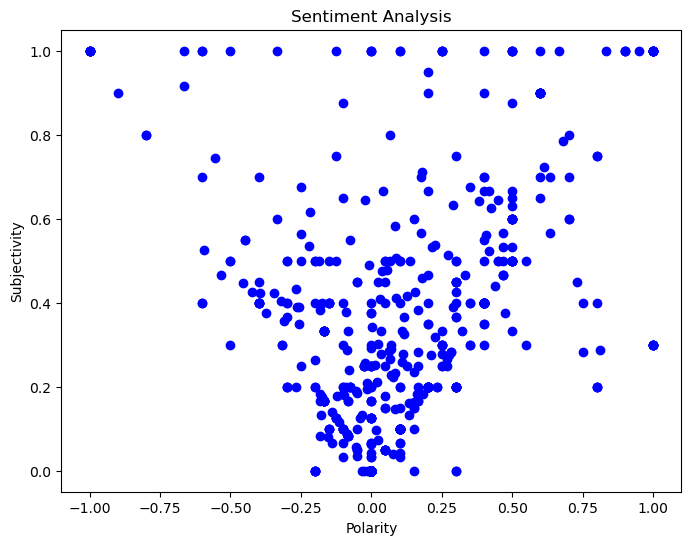

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(review['pol_score'], review['sub_score'], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

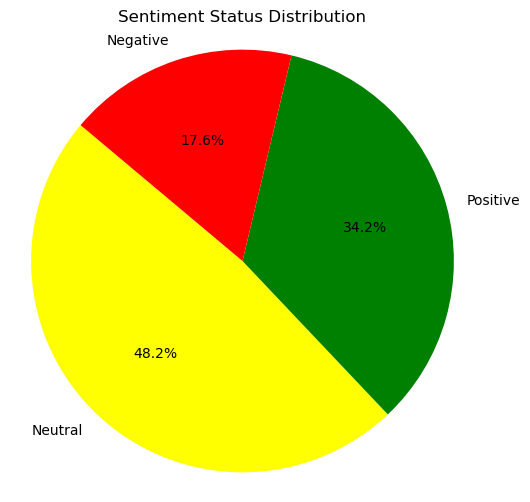

In [46]:
sentiment_counts =review['Sentiment_Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['yellow', 'green', 'red'])
plt.axis('equal')
plt.title('Sentiment Status Distribution')
plt.show()

In [47]:
preview=review[review.Sentiment_Status=='Positive']

In [48]:
preview

,reviw,sub_score,pol_score,Sub_Status,Sentiment_Status
3,journey era birth genesis terrifies astonishes...,0.183333,0.183333,Objective,Positive
9,movie movie action documentary hours hours edg...,0.050000,0.050000,Objective,Positive
10,nolan thrilling biopic cinematography design s...,1.000000,0.250000,Subjective,Positive
12,fan nolan work flipping timelines didn t probl...,0.200000,0.200000,Objective,Positive
13,cillian murphy role oscar cast james remar fil...,0.400000,0.400000,Objective,Positive
...,...,...,...,...,...
1439,imax cause city t hope respect visuals story m...,0.625000,0.425000,Subjective,Positive
1448,movie people process bomb source osciloscope b...,0.400000,0.200000,Objective,Positive
1454,time years movie transitions scenes background...,0.750000,0.300000,Subjective,Positive
1456,chris nolan biopics subject movie score top he...,0.277778,0.111111,Objective,Positive


In [49]:
round((preview.shape[0]/review.shape[0])*100,1)

34.2

In [50]:
nreview=review[review.Sentiment_Status=='Negative']

In [51]:
round((nreview.shape[0]/review.shape[0])*100,1)

17.6

In [52]:
nreview

,reviw,sub_score,pol_score,Sub_Status,Sentiment_Status
1,theater oppenheimer experience people movie ac...,0.000000,-0.012500,Objective,Negative
39,disgrace paper rows dialogue drives scenes sco...,0.100000,-0.100000,Objective,Negative
41,biopic life story robert oppenheimer back styl...,0.200000,-0.075000,Objective,Negative
49,movie films century boring t action sequences ...,0.550000,-0.450000,Subjective,Negative
79,work nolan past casting screen play half life ...,0.138889,-0.138889,Objective,Negative
...,...,...,...,...,...
1421,admirer nolan work soundtrack bombing movie ha...,0.087500,-0.087500,Objective,Negative
1435,yep hours film man hour seconds dialogue dialo...,0.166667,-0.166667,Objective,Negative
1440,movie fault failure role president roosevelt y...,0.377273,-0.090152,Objective,Negative
1452,review science person movie thanks god interne...,0.550000,-0.075000,Subjective,Negative


In [53]:
positivewords=pd.read_table("D:/Data Science & AI/Praxis Data Science/NLP/positive-words.txt")
negativewords1=pd.read_table("D:/Data Science & AI/Praxis Data Science/NLP/negative-words.txt")

In [54]:
preview.dropna(subset=['reviw'],inplace=True)

C:\Users\dipam\AppData\Local\Temp\ipykernel_6544\1046951848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preview.dropna(subset=['reviw'],inplace=True)


In [56]:
import re
import pandas as pd

def ComputeSentimentScore(inputSentence):
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    newSentence=inputSentence.lower()
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    WordList=WordList.split()
    NList=[]
    PList=[]
    
    for newWord in WordList:
        if (newWord in negativewords1.values):
            NList.append(newWord)
            NegativeScore+=1
           
        if (newWord in positivewords.values):
            PList.append(newWord)
            PositiveScore+=1
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive Reviews'
    
    elif((PositiveScore-NegativeScore) == 0):
        OverallSentiment='Neutral Reviews'
    
    else:
        OverallSentiment='Negative Reviews'
        
    return(PList)
sentiment_score = preview['reviw'].apply(ComputeSentimentScore)
preview['sentiment_score_NEW'] = sentiment_score
print(preview)

                                                  reviw  sub_score  pol_score  \
3     journey era birth genesis terrifies astonishes...   0.183333   0.183333   
9     movie movie action documentary hours hours edg...   0.050000   0.050000   
10    nolan thrilling biopic cinematography design s...   1.000000   0.250000   
12    fan nolan work flipping timelines didn t probl...   0.200000   0.200000   
13    cillian murphy role oscar cast james remar fil...   0.400000   0.400000   
...                                                 ...        ...        ...   
1439  imax cause city t hope respect visuals story m...   0.625000   0.425000   
1448  movie people process bomb source osciloscope b...   0.400000   0.200000   
1454  time years movie transitions scenes background...   0.750000   0.300000   
1456  chris nolan biopics subject movie score top he...   0.277778   0.111111   
1462  biography movies bit reason nolan movie thing ...   0.300000   0.400000   

      Sub_Status Sentiment_

C:\Users\dipam\AppData\Local\Temp\ipykernel_6544\2216180062.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preview['sentiment_score_NEW'] = sentiment_score


In [57]:
positive= preview.explode('sentiment_score_NEW')
single_list = positive['sentiment_score_NEW'].tolist()
print(single_list)

['classic', 'contribution', nan, 'thrilling', 'work', 'galore', 'tranquil', nan, 'love', 'fun', nan, 'glitter', 'love', nan, 'brilliant', 'masterpiece', 'brilliance', 'best', 'outstanding', 'work', 'genius', 'accolades', 'masterpiece', 'masterpiece', 'perfection', 'love', 'bravo', 'monumental', 'masterpiece', 'genius', 'flawless', nan, 'recommendation', 'faith', 'treasure', 'award', 'best', 'best', 'supporting', 'master', 'hallmarks', 'awesome', 'top', 'luxury', nan, 'masterpiece', 'smart', nan, 'award', 'wins', 'work', 'thrilling', 'distinction', 'success', 'masterpiece', 'excellence', 'top', 'best', 'revelation', 'blockbuster', 'exceptional', nan, nan, nan, nan, 'love', nan, 'perfect', 'satisfies', 'work', 'masterpiece', 'love', 'flawless', 'greatness', 'achievement', 'masterpiece', 'hero', 'delight', nan, 'work', 'work', nan, nan, 'freedom', 'pinnacle', 'success', 'goodness', 'awe', 'masterpiece', 'brilliance', 'good', 'winners', 'masterpiece', 'genius', 'work', 'work', 'hero', nan,

In [58]:
filtered_text_list = list(text for text in single_list if text is not None and not pd.isnull(text))
print(filtered_text_list)

['classic', 'contribution', 'thrilling', 'work', 'galore', 'tranquil', 'love', 'fun', 'glitter', 'love', 'brilliant', 'masterpiece', 'brilliance', 'best', 'outstanding', 'work', 'genius', 'accolades', 'masterpiece', 'masterpiece', 'perfection', 'love', 'bravo', 'monumental', 'masterpiece', 'genius', 'flawless', 'recommendation', 'faith', 'treasure', 'award', 'best', 'best', 'supporting', 'master', 'hallmarks', 'awesome', 'top', 'luxury', 'masterpiece', 'smart', 'award', 'wins', 'work', 'thrilling', 'distinction', 'success', 'masterpiece', 'excellence', 'top', 'best', 'revelation', 'blockbuster', 'exceptional', 'love', 'perfect', 'satisfies', 'work', 'masterpiece', 'love', 'flawless', 'greatness', 'achievement', 'masterpiece', 'hero', 'delight', 'work', 'work', 'freedom', 'pinnacle', 'success', 'goodness', 'awe', 'masterpiece', 'brilliance', 'good', 'winners', 'masterpiece', 'genius', 'work', 'work', 'hero', 'respect', 'achievement', 'awe', 'work', 'award', 'masterpiece', 'superb', 'joy

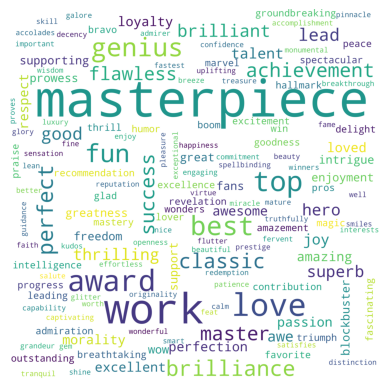

<Figure size 1200x800 with 0 Axes>

In [59]:
import wordcloud
wordcloud =WordCloud(max_words=150,width=5000, height=5000, background_color='white').generate(' '.join(filtered_text_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(12, 8))
plt.show()